### settings

In [ ]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark.git

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 495, done.
remote: Total 495 (delta 0), reused 0 (delta 0), pack-reused 495
Receiving objects: 100% (495/495), 3.07 MiB | 8.33 MiB/s, done.
Resolving deltas: 100% (302/302), done.


In [ ]:
%cd /content/deep-text-recognition-benchmark

/content/deep-text-recognition-benchmark


In [ ]:
!pip install fire

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=0c5f998d56651177a307cfc68d6215797e9f1aa75ccf4642d9064c6cc2cd77f8
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### lmdb dataset 만들기

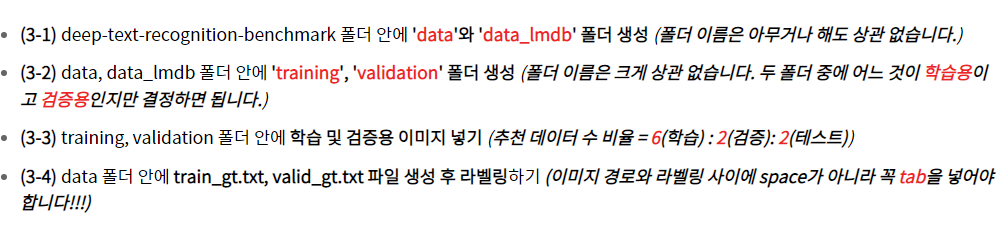

참고: https://ropiens.tistory.com/35    
참고2: https://cvml.tistory.com/22

In [39]:
trainset_path = "/content/drive/MyDrive/OCR/trainset/demo_trainset.zip"

In [40]:
from zipfile import ZipFile
with ZipFile(trainset_path) as zf:
  zf.extractall()

In [41]:
!python create_lmdb_dataset.py --inputPath data/training --gtFile data/train_gt.txt --outputPath data_lmdb/training

Created dataset with 2 samples


In [ ]:
!python create_lmdb_dataset.py --inputPath data/validation --gtFile data/val_gt.txt --outputPath data_lmdb/validation

Created dataset with 2 samples


### 학습 파라미터 세팅    

### 학습전 변환 필수
* dataset.py 87 line: data_loader_iter.next() -> next(data_loader_iter)     
* dataset.py 92 line: self.dataloader_iter_list[i].next() -> next(self.dataloader_iter_list[i])

In [ ]:
# 모델이 판단할 수 있는 글자들
character = '0123456789abcdefghijklmnopqrstuvwxyz가각간갇갈감갑값갓강갖같갚갛개객걀걔거걱건걷걸검겁것겉게겨격겪견결겹경곁계고곡곤곧골곰곱곳공과관광괜괴굉교구국군굳굴굵굶굽궁권귀귓규균귤그극근글긁금급긋긍기긴길김깅깊까깍깎깐깔깜깝깡깥깨꺼꺾껌껍껏껑께껴꼬꼭꼴꼼꼽꽂꽃꽉꽤꾸꾼꿀꿈뀌끄끈끊끌끓끔끗끝끼낌나낙낚난날낡남납낫낭낮낯낱낳내냄냇냉냐냥너넉넌널넓넘넣네넥넷녀녁년념녕노녹논놀놈농높놓놔뇌뇨누눈눕뉘뉴늄느늑는늘늙능늦늬니닐님다닥닦단닫달닭닮담답닷당닿대댁댐댓더덕던덜덟덤덥덧덩덮데델도독돈돌돕돗동돼되된두둑둘둠둡둥뒤뒷드득든듣들듬듭듯등디딩딪따딱딴딸땀땅때땜떠떡떤떨떻떼또똑뚜뚫뚱뛰뜨뜩뜯뜰뜻띄라락란람랍랑랗래랜램랫략량러럭런럴럼럽럿렁렇레렉렌려력련렬렵령례로록론롬롭롯료루룩룹룻뤄류륙률륭르른름릇릎리릭린림립릿링마막만많말맑맘맙맛망맞맡맣매맥맨맵맺머먹먼멀멈멋멍멎메멘멩며면멸명몇모목몬몰몸몹못몽묘무묵묶문묻물뭄뭇뭐뭘뭣므미민믿밀밉밌및밑바박밖반받발밝밟밤밥방밭배백뱀뱃뱉버번벌범법벗베벤벨벼벽변별볍병볕보복볶본볼봄봇봉뵈뵙부북분불붉붐붓붕붙뷰브븐블비빌빔빗빚빛빠빡빨빵빼뺏뺨뻐뻔뻗뼈뼉뽑뿌뿐쁘쁨사삭산살삶삼삿상새색샌생샤서석섞선설섬섭섯성세섹센셈셋셔션소속손솔솜솟송솥쇄쇠쇼수숙순숟술숨숫숭숲쉬쉰쉽슈스슨슬슴습슷승시식신싣실싫심십싯싱싶싸싹싼쌀쌍쌓써썩썰썹쎄쏘쏟쑤쓰쓴쓸씀씌씨씩씬씹씻아악안앉않알앓암압앗앙앞애액앨야약얀얄얇양얕얗얘어억언얹얻얼엄업없엇엉엊엌엎에엔엘여역연열엷염엽엿영옆예옛오옥온올옮옳옷옹와완왕왜왠외왼요욕용우욱운울움웃웅워원월웨웬위윗유육율으윽은을음응의이익인일읽잃임입잇있잊잎자작잔잖잘잠잡잣장잦재쟁쟤저적전절젊점접젓정젖제젠젯져조족존졸좀좁종좋좌죄주죽준줄줌줍중쥐즈즉즌즐즘증지직진질짐집짓징짙짚짜짝짧째쨌쩌쩍쩐쩔쩜쪽쫓쭈쭉찌찍찢차착찬찮찰참찻창찾채책챔챙처척천철첩첫청체쳐초촉촌촛총촬최추축춘출춤춥춧충취츠측츰층치칙친칠침칫칭카칸칼캄캐캠커컨컬컴컵컷케켓켜코콘콜콤콩쾌쿄쿠퀴크큰클큼키킬타탁탄탈탑탓탕태택탤터턱턴털텅테텍텔템토톤톨톱통퇴투툴툼퉁튀튜트특튼튿틀틈티틱팀팅파팎판팔팝패팩팬퍼퍽페펜펴편펼평폐포폭폰표푸푹풀품풍퓨프플픔피픽필핏핑하학한할함합항해핵핸햄햇행향허헌험헤헬혀현혈협형혜호혹혼홀홈홉홍화확환활황회획횟횡효후훈훌훔훨휘휴흉흐흑흔흘흙흡흥흩희흰히힘?!'

# lmdb trainset 경로
train_path = "./data_lmdb/training"

# lmdb validation set 경로
val_path = "./data_lmdb/validation"

# 몇 epoch 마다 validation 결과를 알려줄지
vallinterval = 1

# 배치 사이즈
batch_size = 1

# 학습 수
num_iter = 100

### 학습

In [ ]:
!python train.py \
--train_data $train_path \
--valid_data $val_path \
--character $character \
--batch_size $batch_size \
--num_iter $num_iter \
--select_data ./ \
--batch_ratio 1 \
--valInterval $vallinterval \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: ./data_lmdb/training
opt.select_data: ['./']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    ./data_lmdb/training	 dataset: ./
sub-directory:	/.	 num samples: 2
num total samples of ./: 2 x 1.0 (total_data_usage_ratio) = 2
num samples of ./ per batch: 1 x 1.0 (batch_ratio) = 1
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. P

### demo

In [ ]:
## 기본저장 log_demo_result.txt

In [ ]:
!python demo.py \
--character $character \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder /content/deep-text-recognition-benchmark/data/training \
--saved_model /content/deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
model input parameters 32 100 20 1 512 256 1012 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/deep-text-recognition-benchmark/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
-------------------------

In [38]:
import shutil

shutil.make_archive('/content/deep-text-recognition-benchmark/data_lmdb/training', 'zip')

KeyboardInterrupt: ignored